### Narayan Khanal
### CS420 

In [10]:
%pip install scipy scikit-learn matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [12]:
data = datasets.load_iris()
X = data.data[:,:2]
y = data.target

print(data.feature_names[:2])
print(data.target_names)


['sepal length (cm)', 'sepal width (cm)']
['setosa' 'versicolor' 'virginica']


In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

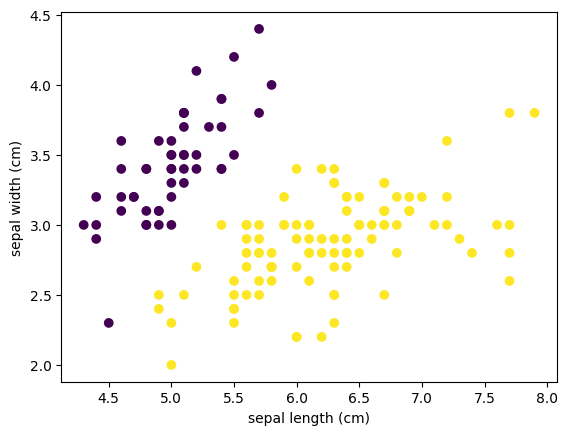

In [14]:
y = np.array(y, dtype=bool)

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.scatter(X[:,0], X[:,1], c=y)

In [15]:
len(y)

150

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [17]:
p = Perceptron()
p.fit(x_train, y_train)

print(f"Training data score: {p.score(x_train, y_train)}")
print(f"Test data score: {p.score(x_test, y_test)}")

Training data score: 1.0
Test data score: 0.9777777777777777


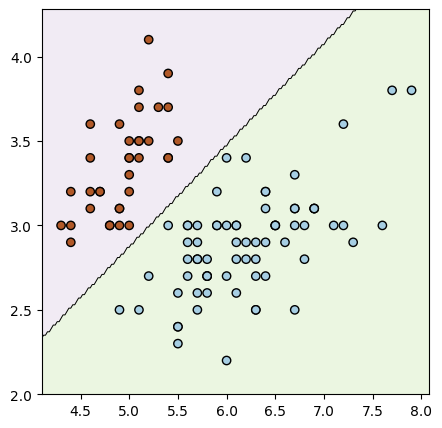

In [18]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    # make a mesh grid with a step size of 0.02
    stepSize = 0.02
    x_min, x_max = X[:,0].min() - 10*stepSize, X[:,0].max() + 10*stepSize
    y_min, y_max = X[:,1].min() - 10*stepSize, X[:,1].max() + 10*stepSize
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize),
                         np.arange(y_min, y_max, stepSize))
    # get model predictions for entire mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the contour based on modelpower predictions
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    # plot the actual data
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

plot_decision_boundary(p, x_train, y_train)